<a href="https://colab.research.google.com/github/loftyiceberg/Pyspark-Capstone-Project/blob/Nikhita/pyspark_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
unicef_data = pd.read_csv("/content/drive/MyDrive/Colabdata/fusion_GLOBAL_DATAFLOW_UNICEF_1.0_Nutrition.csv")

<ipython-input-3-32fe56873b81>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  unicef_data = pd.read_csv("/content/drive/MyDrive/Colabdata/fusion_GLOBAL_DATAFLOW_UNICEF_1.0_Nutrition.csv")


In [ ]:
df = unicef_data.copy()

In [ ]:
# In order to be able to see all the rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

DATAFLOW REF_AREA:Geographic area  \
0  UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...         AFG: Afghanistan   
1  UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...         AFG: Afghanistan   
2  UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...         AFG: Afghanistan   
3  UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...         AFG: Afghanistan   
4  UNICEF:GLOBAL_DATAFLOW(1.0): Cross-sector indi...         AFG: Afghanistan   

                INDICATOR:Indicator    SEX:Sex TIME_PERIOD:Time period  \
0  NT_ANT_BAZ_AVG: Mean BMI-for-age  F: Female                    2004   
1  NT_ANT_BAZ_AVG: Mean BMI-for-age  F: Female                    2013   
2  NT_ANT_BAZ_AVG: Mean BMI-for-age  F: Female                    2018   
3  NT_ANT_BAZ_AVG: Mean BMI-for-age    M: Male                    2004   
4  NT_ANT_BAZ_AVG: Mean BMI-for-age    M: Male                    2013   

  OBS_VALUE:Observation Value UNIT_MULTIPLIER:Unit multiplier  \
0                        -0.1                        0: Units   
1                        -0.1                        0: Units   
2                         0.1                        0: Units   
3                         0.1                        0: Units   
4                        -0.1                        0: Units   

  UNIT_MEASURE:Unit of measure OBS_STATUS:Observation Status  \
0               NUMBER: Number       ER: External Reanalysis   
1               NUMBER: Number                RA: Reanalysed   
2               NUMBER: Number                RA: Reanalysed   
3               NUMBER: Number       ER: External Reanalysis   
4               NUMBER: Number                RA: Reanalysed   

  OBS_CONF:Observation confidentaility  LOWER_BOUND:Lower Bound  \
0                              F: Free                      NaN   
1                              F: Free                     -0.1   
2                              F: Free                      0.1   
3                              F: Free                      NaN   
4                              F: Free                     -0.2   

   UPPER_BOUND:Upper Bound  WGTD_SAMPL_SIZE:Weighted Sample Size  \
0                      NaN                                 436.0   
1                     -0.0                             2091807.0   
2                      0.2                                9457.1   
3                      NaN                                 510.0   
4                     -0.1                             2175847.0   

                   OBS_FOOTNOTE:Observation footnote  \
0  Reduced age range Age 0-5 months not covered  ...   
1  Oedema data was not considered in the analysis...   
2  Oedema data was not considered in the analysis...   
3  Reduced age range Age 0-5 months not covered  ...   
4  Oedema data was not considered in the analysis...   

                     SERIES_FOOTNOTE:Series footnote  \
0  UNICEF/WHO/World Bank Joint Malnutrition Estim...   
1  UNICEF/WHO/World Bank Joint Malnutrition Estim...   
2  UNICEF/WHO/World Bank Joint Malnutrition Estim...   
3  UNICEF/WHO/World Bank Joint Malnutrition Estim...   
4  UNICEF/WHO/World Bank Joint Malnutrition Estim...   

                             DATA_SOURCE:Data Source  \
0  Summary report of the national nutrition surve...   
1         Afghanistan National Nutrition Survey 2013   
2                     Afghanistan Health Survey 2018   
3  Summary report of the national nutrition surve...   
4         Afghanistan National Nutrition Survey 2013   

  SOURCE_LINK:Citation of or link to the data source  \
0  https://data.unicef.org/topic/nutrition/malnut...   
1  https://data.unicef.org/topic/nutrition/malnut...   
2  https://data.unicef.org/topic/nutrition/malnut...   
3  https://data.unicef.org/topic/nutrition/malnut...   
4  https://data.unicef.org/topic/nutrition/malnut...   

                                 CUSTODIAN:Custodian  \
0  UNICEF Division of Data  Analysis  Planning an...   
1  UNICEF Division of Data  Analysis  Planning an...   
2  UNICE

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215721 entries, 0 to 215720
Data columns (total 22 columns):
 #   Column                                                                          Non-Null Count   Dtype  
---  ------                                                                          --------------   -----  
 0   DATAFLOW                                                                        215721 non-null  object 
 1   REF_AREA:Geographic area                                                        215721 non-null  object 
 2   INDICATOR:Indicator                                                             215721 non-null  object 
 3   SEX:Sex                                                                         215721 non-null  object 
 4   TIME_PERIOD:Time period                                                         215721 non-null  object 
 5   OBS_VALUE:Observation Value                                                     215721 non-null  object 
 6   UNIT

In [ ]:
df.isna().sum()

DATAFLOW                                                                               0
REF_AREA:Geographic area                                                               0
INDICATOR:Indicator                                                                    0
SEX:Sex                                                                                0
TIME_PERIOD:Time period                                                                0
OBS_VALUE:Observation Value                                                            0
UNIT_MULTIPLIER:Unit multiplier                                                      410
UNIT_MEASURE:Unit of measure                                                           0
OBS_STATUS:Observation Status                                                      48290
OBS_CONF:Observation confidentaility                                                 410
LOWER_BOUND:Lower Bound                                                            23633
UPPER_BOUND:Upper Bou

In [ ]:
# For better readability of data
df['Indicator'] = df['INDICATOR:Indicator'].apply(lambda x: x[x.index(":")+1 :])
df['Age'] = df['AGE:Current age'].apply(lambda x: x[x.index(":")+1 :])
df['Sex'] = df['SEX:Sex'].apply(lambda x: x[x.index(":")+1 :])
df['Geographic_Area'] = df['REF_AREA:Geographic area'].apply(lambda x: x[x.index(":")+1 :])
df['Unit'] = df['UNIT_MEASURE:Unit of measure'].apply(lambda x: x[x.index(":")+1 :])

In [ ]:
df.rename(columns = {'OBS_VALUE:Observation Value':'Observation_value'}, inplace = True)
df.rename(columns = {'TIME_PERIOD:Time period':'Time_period'}, inplace = True)

In [ ]:
new_df = df[['Geographic_Area','Time_period','Age','Sex','Indicator','Observation_value','Unit']].copy()

In [ ]:
new_df.head()

Geographic_Area Time_period                 Age      Sex          Indicator  \
0     Afghanistan        2004   Under 5 years old   Female   Mean BMI-for-age   
1     Afghanistan        2013   Under 5 years old   Female   Mean BMI-for-age   
2     Afghanistan        2018   Under 5 years old   Female   Mean BMI-for-age   
3     Afghanistan        2004   Under 5 years old     Male   Mean BMI-for-age   
4     Afghanistan        2013   Under 5 years old     Male   Mean BMI-for-age   

  Observation_value     Unit  
0              -0.1   Number  
1              -0.1   Number  
2               0.1   Number  
3               0.1   Number  
4              -0.1   Number

In [ ]:
new_df.tail()

Geographic_Area Time_period                  Age     Sex  \
215716        Zimbabwe        2016   6 to 59 months old   Total   
215717        Zimbabwe        2017   6 to 59 months old   Total   
215718        Zimbabwe        2018   6 to 59 months old   Total   
215719        Zimbabwe        2019   6 to 59 months old   Total   
215720        Zimbabwe        2020   6 to 59 months old   Total   

                           Indicator Observation_value Unit  
215716   Vitamin A two-dose coverage              35.0    %  
215717   Vitamin A two-dose coverage              43.0    %  
215718   Vitamin A two-dose coverage              40.0    %  
215719   Vitamin A two-dose coverage              44.0    %  
215720   Vitamin A two-dose coverage              29.0    %

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215721 entries, 0 to 215720
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Geographic_Area    215721 non-null  object
 1   Time_period        215721 non-null  object
 2   Age                215721 non-null  object
 3   Sex                215721 non-null  object
 4   Indicator          215721 non-null  object
 5   Observation_value  215721 non-null  object
 6   Unit               215721 non-null  object
dtypes: object(7)
memory usage: 11.5+ MB


In [ ]:
new_df.isna().sum()

Geographic_Area      0
Time_period          0
Age                  0
Sex                  0
Indicator            0
Observation_value    0
Unit                 0
dtype: int64

In [ ]:
new_df.describe()

Geographic_Area Time_period                 Age     Sex  \
count           215721      215721              215721  215721   
unique             207         139                  10       3   
top               Peru        2000   Under 5 years old   Total   
freq              4452       11014              135974   90986   

                                                Indicator Observation_value  \
count                                              215721            215721   
unique                                                 97              9332   
top      Prevalence of overweight among children aged ...               1.1   
freq                                                23940              3075   

          Unit  
count   215721  
unique       2  
top          %  
freq    189070

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
new_df['Observation_value'].value_counts()

1.1                  3075
1.2                  2928
1.3                  2641
0.3                  2224
1.4                  2131
1.5                  2013
0.2                  1978
0.5                  1899
0.4                  1894
0.1                  1872
0.6                  1822
0.7                  1808
1.0                  1804
0.9                  1784
0.8                  1669
1.6                  1627
1.7                  1430
1.8                  1329
1.9                  1296
2.1                  1175
2.2                  1168
2.5                  1117
2.4                  1040
2.3                  1013
0.0                   994
2.6                   982
3.4                   964
2.8                   950
2.7                   931
3.3                   918
3.5                   915
3.2                   900
2.0                   896
3.7                   885
3.1                   885
2.9                   879
1.1                   872
3.9                   867
3.6         

**The observation values column has a value'<1'. So this column cannot be converted to float**

In [ ]:
new_df['Observation_value'] = new_df['Observation_value'].replace('<1','0.99')

In [ ]:
new_df.Observation_value = new_df.Observation_value.astype(float)

In [ ]:
year_wise_avg_df = new_df.pivot_table(index = 'Time_period', columns="Indicator",values="Observation_value", aggfunc = np.mean)

In [ ]:
year_wise_avg_df.head()

Indicator     BMI-for-age (Standard Deviation)   BMI-for-age <-1 SD  \
Time_period                                                           
1975                                       NaN                  NaN   
1976                                       NaN                  NaN   
1977                                       NaN                  NaN   
1978                                       NaN                  NaN   
1979                                       NaN                  NaN   

Indicator     BMI-for-age <-1 SD and ≥ -2 SD, Survey Estimates  \
Time_period                                                      
1975                                                       NaN   
1976                                                       NaN   
1977                                                       NaN   
1978                                                       NaN   
1979                                                       NaN   

Indicator     BMI-for-age <-2 SD  \
Time_period                        
1975                         NaN   
1976                         NaN   
1977                         NaN   
1978                         NaN   
1979                         NaN   

Indicator     BMI-for-age <-2 SD and ≥ -3 SD, Survey Estimates  \
Time_period                                                      
1975                                                       NaN   
1976                                                       NaN   
1977                                                       NaN   
1978                                                       NaN   
1979                                                       NaN   

Indicator     BMI-for-age <-3 SD   BMI-for-age >+1 SD  \
Time_period                                             
1975                         NaN                  NaN   
1976                         NaN                  NaN   
1977                         NaN                  NaN   
1978                         NaN                  NaN   
1979                         NaN                  NaN   

Indicator     BMI-for-age >+1 SD and ≤+2 SD, Survey Estimates  \
Time_period                                                     
1975                                                      NaN   
1976                                                      NaN   
1977                                                      NaN   
1978                                                      NaN   
1979                                                      NaN   

Indicator     BMI-for-age >+2 SD  \
Time_period                        
1975                         NaN   
1976                         NaN   
1977                         NaN   
1978                         NaN   
1979                         NaN   

Indicator     BMI-for-age >+2 SD and ≤+3 SD, Survey Estimates  \
Time_period                                                     
1975                                                      NaN   
1976                                                      NaN   
1977                                                      NaN   
1978                                                      NaN   
1979                                                      NaN   

Indicator     BMI-for-age >+3 SD   Continued breastfeeding (12-15 months)  \
Time_period                                                                 
1975                         NaN                                      NaN   
1976                         NaN                                      NaN   
1977                         NaN                                      NaN   
1978                         NaN                                      NaN   
1979                         NaN                                      NaN   

Indicator     Continued breastfeeding (12-23 months)  \
Time_period                                            
1975                                             NaN   
1976                                             N

In [ ]:
year_wise_avg_df.tail()

Indicator     BMI-for-age (Standard Deviation)   BMI-for-age <-1 SD  \
Time_period                                                           
2020-12-11                            0.933333            11.400000   
2021                                  1.153846            19.810256   
2021-09-30                                 NaN                  NaN   
2021-10-10                                 NaN                  NaN   
2022                                  1.133333            33.133333   

Indicator     BMI-for-age <-1 SD and ≥ -2 SD, Survey Estimates  \
Time_period                                                      
2020-12-11                                           10.100000   
2021                                                 15.929167   
2021-09-30                                                 NaN   
2021-10-10                                                 NaN   
2022                                                       NaN   

Indicator     BMI-for-age <-2 SD  \
Time_period                        
2020-12-11              1.300000   
2021                    5.300000   
2021-09-30                   NaN   
2021-10-10                   NaN   
2022                    9.066667   

Indicator     BMI-for-age <-2 SD and ≥ -3 SD, Survey Estimates  \
Time_period                                                      
2020-12-11                                            1.200000   
2021                                                  4.620833   
2021-09-30                                                 NaN   
2021-10-10                                                 NaN   
2022                                                       NaN   

Indicator     BMI-for-age <-3 SD   BMI-for-age >+1 SD  \
Time_period                                             
2020-12-11              0.100000            15.600000   
2021                    1.251282            17.776923   
2021-09-30                   NaN                  NaN   
2021-10-10                   NaN                  NaN   
2022                    1.800000             6.966667   

Indicator     BMI-for-age >+1 SD and ≤+2 SD, Survey Estimates  \
Time_period                                                     
2020-12-11                                          12.966667   
2021                                                12.558333   
2021-09-30                                                NaN   
2021-10-10                                                NaN   
2022                                                      NaN   

Indicator     BMI-for-age >+2 SD  \
Time_period                        
2020-12-11              2.666667   
2021                    4.630769   
2021-09-30                   NaN   
2021-10-10                   NaN   
2022                    1.350000   

Indicator     BMI-for-age >+2 SD and ≤+3 SD, Survey Estimates  \
Time_period                                                     
2020-12-11                                           2.533333   
2021                                                 3.333333   
2021-09-30                                                NaN   
2021-10-10                                                NaN   
2022                                                      NaN   

Indicator     BMI-for-age >+3 SD   Continued breastfeeding (12-15 months)  \
Time_period                                                                 
2020-12-11              0.133333                                      NaN   
2021                    1.169231                                      NaN   
2021-09-30                   NaN                                      NaN   
2021-10-10                   NaN                                      NaN   
2022                    0.316667                                      NaN   

Indicator     Continued breastfeeding (12-23 months)  \
Time_period                                            
2020-12-11                                       NaN   
2021                                             N

In [ ]:
year_wise_avg_df.index

Index(['1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984',
       ...
       '2019-11-07', '2020', '2020-01-01', '2020-04-16', '2020-07-02',
       '2020-12-11', '2021', '2021-09-30', '2021-10-10', '2022'],
      dtype='object', name='Time_period', length=139)

**Time_period has to be in a single format. But here we can see that date is in two formats : yyyy-mm-dd or yyyy. Majority readings are in yyyy format. So there is a need to convert yyyy-mm-dd to yyyy. However care has to be taken that we do not generate duplicate readings in this process. Another option is to drop the observations that are in yyyy-mm-dd format**

In [ ]:
invalid_date_list =[]
for i in list(year_wise_avg_df.index):
  if(len(i) != 4):
    invalid_date_list.append(i)

In [ ]:
invalid_date_list

['2000-05-31',
 '2000-12-31',
 '2005-07-02',
 '2005-11-16',
 '2005-12-01',
 '2005-12-07',
 '2005-12-31',
 '2006-01-01',
 '2006-01-30',
 '2006-03-28',
 '2006-11-01',
 '2008-03-31',
 '2008-11-18',
 '2010-06-05',
 '2010-06-12',
 '2010-07-23',
 '2010-08-01',
 '2010-08-22',
 '2010-09-07',
 '2010-09-10',
 '2010-10-04',
 '2010-10-24',
 '2010-10-29',
 '2010-12-21',
 '2011-05-02',
 '2011-09-16',
 '2011-09-30',
 '2011-11-12',
 '2011-12-31',
 '2012-01-06',
 '2012-01-31',
 '2012-03-22',
 '2012-04-01',
 '2012-04-11',
 '2012-07-16',
 '2012-07-31',
 '2012-08-06',
 '2013-02-01',
 '2013-02-16',
 '2013-06-16',
 '2013-06-20',
 '2014-05-18',
 '2014-06-10',
 '2014-07-01',
 '2014-12-29',
 '2015-01-05',
 '2015-01-09',
 '2015-02-14',
 '2015-04-16',
 '2015-04-26',
 '2015-05-22',
 '2015-06-21',
 '2015-09-05',
 '2015-10-28',
 '2015-10-30',
 '2015-11-17',
 '2015-12-28',
 '2015-12-31',
 '2016-01-15',
 '2016-05-11',
 '2016-05-15',
 '2016-07-02',
 '2016-09-01',
 '2016-10-01',
 '2016-12-01',
 '2017-07-01',
 '2017-09-

In [ ]:
len(invalid_date_list)

91

In [ ]:
year_wise_avg_df.drop(invalid_date_list, inplace = True)

In [ ]:
year_wise_avg_df

Indicator     BMI-for-age (Standard Deviation)   BMI-for-age <-1 SD  \
Time_period                                                           
1975                                       NaN                  NaN   
1976                                       NaN                  NaN   
1977                                       NaN                  NaN   
1978                                       NaN                  NaN   
1979                                       NaN                  NaN   
1980                                       NaN                  NaN   
1981                                       NaN                  NaN   
1982                                       NaN                  NaN   
1983                                       NaN                  NaN   
1984                                       NaN                  NaN   
1985                                       NaN                  NaN   
1986                                  1.166667            14.808333   
1987                                  1.114286            24.085714   
1988                                  1.166667            14.704167   
1989                                  1.183333            12.858333   
1990                                  1.250000            13.877778   
1991                                  1.329630            15.866667   
1992                                  1.343590            19.933333   
1993                                  1.288889            22.413889   
1994                                  1.314815            23.562963   
1995                                  1.413333            17.359259   
1996                                  1.312500            20.229167   
1997                                  1.371795            23.766667   
1998                                  1.297917            18.780000   
1999                                  1.303922            19.277083   
2000                                  1.379861            20.909220   
2001                                  1.344444            22.030952   
2002                                  1.301852            16.640000   
2003                                  1.349020            17.395238   
2004                                  1.304348            18.243137   
2005                                  1.379310            15.984615   
2006                                  1.399074            18.205208   
2007                                  1.334667            21.511111   
2008                                  1.257895            17.677778   
2009                                  1.236667            17.419608   
2010                                  1.318750            20.111905   
2011                                  1.249425            21.753086   
2012                                  1.239216            18.325253   
2013                                  1.292000            20.894203   
2014                                  1.192105            18.555856   
2015                                  1.213636            19.227273   
2016                                  1.166667            17.464368   
2017                                  1.200000            18.068254   
2018                                  1.172549            15.601961   
2019                                  1.203810            16.057143   
2020                                  1.165000            18.493333   
2021                                  1.153846            19.810256   
2022                                  1.133333            33.133333   

Indicator     BMI-for-age <-1 SD and ≥ -2 SD, Survey Estimates  \
Time_period                                                      
1975                                                       NaN   
1976                                                       NaN   
1977                                                       NaN   
1978                                                       NaN   
1979                                                 

In [ ]:
# Since the scope of the project deals is limited to children under 5 years of age, dropping the columns which give information about children above 5 years
year_wise_avg_df.drop([' Prevalence of overweight among children aged 10-19 years, BMI > +1 standard deviations above the median (Crude estimate)',' Prevalence of thinness among children aged 10-19 years, BMI < -2 standard deviations below the median (Crude estimate)'],axis = 1,inplace =True)

In [ ]:
year_wise_avg_df

Indicator     BMI-for-age (Standard Deviation)   BMI-for-age <-1 SD  \
Time_period                                                           
1975                                       NaN                  NaN   
1976                                       NaN                  NaN   
1977                                       NaN                  NaN   
1978                                       NaN                  NaN   
1979                                       NaN                  NaN   
1980                                       NaN                  NaN   
1981                                       NaN                  NaN   
1982                                       NaN                  NaN   
1983                                       NaN                  NaN   
1984                                       NaN                  NaN   
1985                                       NaN                  NaN   
1986                                  1.166667            14.808333   
1987                                  1.114286            24.085714   
1988                                  1.166667            14.704167   
1989                                  1.183333            12.858333   
1990                                  1.250000            13.877778   
1991                                  1.329630            15.866667   
1992                                  1.343590            19.933333   
1993                                  1.288889            22.413889   
1994                                  1.314815            23.562963   
1995                                  1.413333            17.359259   
1996                                  1.312500            20.229167   
1997                                  1.371795            23.766667   
1998                                  1.297917            18.780000   
1999                                  1.303922            19.277083   
2000                                  1.379861            20.909220   
2001                                  1.344444            22.030952   
2002                                  1.301852            16.640000   
2003                                  1.349020            17.395238   
2004                                  1.304348            18.243137   
2005                                  1.379310            15.984615   
2006                                  1.399074            18.205208   
2007                                  1.334667            21.511111   
2008                                  1.257895            17.677778   
2009                                  1.236667            17.419608   
2010                                  1.318750            20.111905   
2011                                  1.249425            21.753086   
2012                                  1.239216            18.325253   
2013                                  1.292000            20.894203   
2014                                  1.192105            18.555856   
2015                                  1.213636            19.227273   
2016                                  1.166667            17.464368   
2017                                  1.200000            18.068254   
2018                                  1.172549            15.601961   
2019                                  1.203810            16.057143   
2020                                  1.165000            18.493333   
2021                                  1.153846            19.810256   
2022                                  1.133333            33.133333   

Indicator     BMI-for-age <-1 SD and ≥ -2 SD, Survey Estimates  \
Time_period                                                      
1975                                                       NaN   
1976                                                       NaN   
1977                                                       NaN   
1978                                                       NaN   
1979                                                 

In [ ]:
list(year_wise_avg_df.index)[:11]

['1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985']

In [ ]:
#Since there us not much significant data corresponding to the first 11 years i.e., from 1975 to 1985, we can drop those rows
year_wise_avg_df.drop(list(year_wise_avg_df.index)[:11], inplace = True)

In [ ]:
year_wise_avg_df

Indicator     BMI-for-age (Standard Deviation)   BMI-for-age <-1 SD  \
Time_period                                                           
1986                                  1.166667            14.808333   
1987                                  1.114286            24.085714   
1988                                  1.166667            14.704167   
1989                                  1.183333            12.858333   
1990                                  1.250000            13.877778   
1991                                  1.329630            15.866667   
1992                                  1.343590            19.933333   
1993                                  1.288889            22.413889   
1994                                  1.314815            23.562963   
1995                                  1.413333            17.359259   
1996                                  1.312500            20.229167   
1997                                  1.371795            23.766667   
1998                                  1.297917            18.780000   
1999                                  1.303922            19.277083   
2000                                  1.379861            20.909220   
2001                                  1.344444            22.030952   
2002                                  1.301852            16.640000   
2003                                  1.349020            17.395238   
2004                                  1.304348            18.243137   
2005                                  1.379310            15.984615   
2006                                  1.399074            18.205208   
2007                                  1.334667            21.511111   
2008                                  1.257895            17.677778   
2009                                  1.236667            17.419608   
2010                                  1.318750            20.111905   
2011                                  1.249425            21.753086   
2012                                  1.239216            18.325253   
2013                                  1.292000            20.894203   
2014                                  1.192105            18.555856   
2015                                  1.213636            19.227273   
2016                                  1.166667            17.464368   
2017                                  1.200000            18.068254   
2018                                  1.172549            15.601961   
2019                                  1.203810            16.057143   
2020                                  1.165000            18.493333   
2021                                  1.153846            19.810256   
2022                                  1.133333            33.133333   

Indicator     BMI-for-age <-1 SD and ≥ -2 SD, Survey Estimates  \
Time_period                                                      
1986                                                 10.450000   
1987                                                 18.461905   
1988                                                 11.142857   
1989                                                  7.466667   
1990                                                  8.933333   
1991                                                 10.055556   
1992                                                 12.600000   
1993                                                 15.077778   
1994                                                 14.279167   
1995                                                 10.770833   
1996                                                 12.333333   
1997                                                 14.303030   
1998                                                 12.411905   
1999                                                 12.933333   
2000                                                 13.490370   
2001                                                 13.557576   
2002                                      

In [ ]:
year_wise_avg_df.shape

(37, 95)

In [ ]:
year_wise_avg_df.isna().sum()

Indicator
 BMI-for-age (Standard Deviation)                                                 0
 BMI-for-age <-1 SD                                                               0
 BMI-for-age <-1 SD and ≥ -2 SD, Survey Estimates                                 1
 BMI-for-age <-2 SD                                                               0
 BMI-for-age <-2 SD and ≥ -3 SD, Survey Estimates                                 1
 BMI-for-age <-3 SD                                                               0
 BMI-for-age >+1 SD                                                               0
 BMI-for-age >+1 SD and ≤+2 SD, Survey Estimates                                  1
 BMI-for-age >+2 SD                                                               0
 BMI-for-age >+2 SD and ≤+3 SD, Survey Estimates                                  1
 BMI-for-age >+3 SD                                                               0
 Continued breastfeeding (12-15 months)                           

In [ ]:
# For time series forecasting we intend to forecast the burdens of malnutrition.
burdens_of_malnutrition = [' Height-for-age <-2 SD (stunting)', ' Height-for-age <-3 SD (Severe Stunting)', ' Weight-for-age <-2 SD (Underweight)',' Weight-for-age <-3 SD (Severe Underweight)',' Weight-for-height <-2 SD (wasting)',' Weight-for-height <-3 SD (severe wasting)', ' Weight-for-height >+2 SD (overweight)',' Weight-for-height >+3 SD']

In [ ]:
time_series_df = year_wise_avg_df[burdens_of_malnutrition].copy()

In [ ]:
time_series_df

Indicator     Height-for-age <-2 SD (stunting)  \
Time_period                                      
1986                                 28.316667   
1987                                 34.066667   
1988                                 34.166667   
1989                                 28.655556   
1990                                 33.188235   
1991                                 33.764103   
1992                                 41.665217   
1993                                 33.458696   
1994                                 32.228205   
1995                                 31.466667   
1996                                 33.033333   
1997                                 36.019565   
1998                                 32.441071   
1999                                 30.768333   
2000                                 30.716667   
2001                                 30.528000   
2002                                 27.011475   
2003                                 28.692982   
2004                                 25.381250   
2005                                 26.464045   
2006                                 25.942500   
2007                                 26.844944   
2008                                 24.163889   
2009                                 28.201136   
2010                                 27.879412   
2011                                 26.575532   
2012                                 19.688393   
2013                                 25.844304   
2014                                 23.230714   
2015                                 27.251389   
2016                                 20.180000   
2017                                 20.074026   
2018                                 22.707627   
2019                                 18.525688   
2020                                 23.482540   
2021                                 20.125000   
2022                                 31.341667   

Indicator     Height-for-age <-3 SD (Severe Stunting)  \
Time_period                                             
1986                                         9.016667   
1987                                        14.880952   
1988                                        13.787500   
1989                                         9.283333   
1990                                        12.800000   
1991                                        15.386667   
1992                                        19.443590   
1993                                        12.855556   
1994                                        12.700000   
1995                                        13.610000   
1996                                        15.829167   
1997                                        18.023077   
1998                                        14.114583   
1999                                        13.880392   
2000                                        13.918667   
2001                                        14.553333   
2002                                        12.096491   
2003                                        12.250980   
2004                                        11.373333   
2005                                        11.627778   
2006                                        11.139316   
2007                                        11.163218   
2008                                         9.473437   
2009                                        11.123171   
2010                                        11.517647   
2011                                        10.672165   
2012                                         6.834821   
2013                                        11.261644   
2014                                         8.911765   
2015                                         9.812676   
2016                                         7.007692   
2017                                         6.421053   
2018                                         8.046154   
2019                                         6.038739 

In [ ]:
time_series_df.isna().sum()

Indicator
 Height-for-age <-2 SD (stunting)              0
 Height-for-age <-3 SD (Severe Stunting)       0
 Weight-for-age <-2 SD (Underweight)           0
 Weight-for-age <-3 SD (Severe Underweight)    0
 Weight-for-height <-2 SD (wasting)            0
 Weight-for-height <-3 SD (severe wasting)     0
 Weight-for-height >+2 SD (overweight)         0
 Weight-for-height >+3 SD                      0
dtype: int64

In [ ]:
time_series_df = time_series_df.reset_index()

In [ ]:
time_series_df.head()

Indicator Time_period   Height-for-age <-2 SD (stunting)  \
0                1986                          28.316667   
1                1987                          34.066667   
2                1988                          34.166667   
3                1989                          28.655556   
4                1990                          33.188235   

Indicator   Height-for-age <-3 SD (Severe Stunting)  \
0                                          9.016667   
1                                         14.880952   
2                                         13.787500   
3                                          9.283333   
4                                         12.800000   

Indicator   Weight-for-age <-2 SD (Underweight)  \
0                                     19.200000   
1                                     18.626316   
2                                     13.952632   
3                                     15.540000   
4                                     17.852381   

Indicator   Weight-for-age <-3 SD (Severe Underweight)  \
0                                             3.141667   
1                                             6.347619   
2                                             4.279167   
3                                             3.266667   
4                                             4.500000   

Indicator   Weight-for-height <-2 SD (wasting)  \
0                                     7.066667   
1                                     5.441176   
2                                     4.710526   
3                                     6.175000   
4                                     6.341176   

Indicator   Weight-for-height <-3 SD (severe wasting)  \
0                                            1.700000   
1                                            1.466667   
2                                            0.950000   
3                                            1.172727   
4                                            1.875000   

Indicator   Weight-for-height >+2 SD (overweight)   Weight-for-height >+3 SD  
0                                        4.980000                   0.950000  
1                                        2.556000                   0.442857  
2                                        4.216000                   0.862500  
3                                        5.785714                   0.991667  
4                                        5.335714                   1.508333

In [ ]:
time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Time_period                                  37 non-null     object 
 1    Height-for-age <-2 SD (stunting)            37 non-null     float64
 2    Height-for-age <-3 SD (Severe Stunting)     37 non-null     float64
 3    Weight-for-age <-2 SD (Underweight)         37 non-null     float64
 4    Weight-for-age <-3 SD (Severe Underweight)  37 non-null     float64
 5    Weight-for-height <-2 SD (wasting)          37 non-null     float64
 6    Weight-for-height <-3 SD (severe wasting)   37 non-null     float64
 7    Weight-for-height >+2 SD (overweight)       37 non-null     float64
 8    Weight-for-height >+3 SD                    37 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.7+ KB


In [ ]:
# Converting FullDate column into DateTime
time_series_df.Time_period = pd.to_datetime(time_series_df["Time_period"],format = "%Y-%m-%d").dt.year

In [ ]:
time_series_df.head()

Indicator  Time_period   Height-for-age <-2 SD (stunting)  \
0                 1986                          28.316667   
1                 1987                          34.066667   
2                 1988                          34.166667   
3                 1989                          28.655556   
4                 1990                          33.188235   

Indicator   Height-for-age <-3 SD (Severe Stunting)  \
0                                          9.016667   
1                                         14.880952   
2                                         13.787500   
3                                          9.283333   
4                                         12.800000   

Indicator   Weight-for-age <-2 SD (Underweight)  \
0                                     19.200000   
1                                     18.626316   
2                                     13.952632   
3                                     15.540000   
4                                     17.852381   

Indicator   Weight-for-age <-3 SD (Severe Underweight)  \
0                                             3.141667   
1                                             6.347619   
2                                             4.279167   
3                                             3.266667   
4                                             4.500000   

Indicator   Weight-for-height <-2 SD (wasting)  \
0                                     7.066667   
1                                     5.441176   
2                                     4.710526   
3                                     6.175000   
4                                     6.341176   

Indicator   Weight-for-height <-3 SD (severe wasting)  \
0                                            1.700000   
1                                            1.466667   
2                                            0.950000   
3                                            1.172727   
4                                            1.875000   

Indicator   Weight-for-height >+2 SD (overweight)   Weight-for-height >+3 SD  
0                                        4.980000                   0.950000  
1                                        2.556000                   0.442857  
2                                        4.216000                   0.862500  
3                                        5.785714                   0.991667  
4                                        5.335714                   1.508333

In [ ]:
time_series_df.rename(columns = {' Height-for-age <-2 SD (stunting)':'Stunting'}, inplace = True)
time_series_df.rename(columns = {' Height-for-age <-3 SD (Severe Stunting)':'Severe_Stunting'}, inplace = True)
time_series_df.rename(columns = {' Weight-for-age <-2 SD (Underweight)':'Underweight'}, inplace = True)
time_series_df.rename(columns = {' Weight-for-age <-3 SD (Severe Underweight)':'Severe_Underweight'}, inplace = True)
time_series_df.rename(columns = {' Weight-for-height <-2 SD (wasting)':'Wasting'}, inplace = True)
time_series_df.rename(columns = {' Weight-for-height <-3 SD (severe wasting)':'Severe_Wasting'}, inplace = True)
time_series_df.rename(columns = {' Weight-for-height >+2 SD (overweight)':'Overweight'}, inplace = True)
time_series_df.rename(columns = {' Weight-for-height >+3 SD':'Obese'}, inplace = True)

In [ ]:
time_series_df.head()

Indicator  Time_period   Stunting  Severe_Stunting  Underweight  \
0                 1986  28.316667         9.016667    19.200000   
1                 1987  34.066667        14.880952    18.626316   
2                 1988  34.166667        13.787500    13.952632   
3                 1989  28.655556         9.283333    15.540000   
4                 1990  33.188235        12.800000    17.852381   

Indicator  Severe_Underweight   Wasting  Severe_Wasting  Overweight     Obese  
0                    3.141667  7.066667        1.700000    4.980000  0.950000  
1                    6.347619  5.441176        1.466667    2.556000  0.442857  
2                    4.279167  4.710526        0.950000    4.216000  0.862500  
3                    3.266667  6.175000        1.172727    5.785714  0.991667  
4                    4.500000  6.341176        1.875000    5.335714  1.508333

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(time_series_df.Time_period, time_series_df.Stunting)
plt.xlabel('Year')
plt.ylabel('Stunting')
plt.title('Year-wise stunting')
plt.show()

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(time_series_df.Time_period, time_series_df.Severe_Stunting)
plt.xlabel('Year')
plt.ylabel('Severe stunting')
plt.title('Year-wise severe stunting')
plt.show()

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(time_series_df.Time_period, time_series_df.Underweight)
plt.xlabel('Year')
plt.ylabel('Underweight')
plt.title('Year-wise underweight')
plt.show()

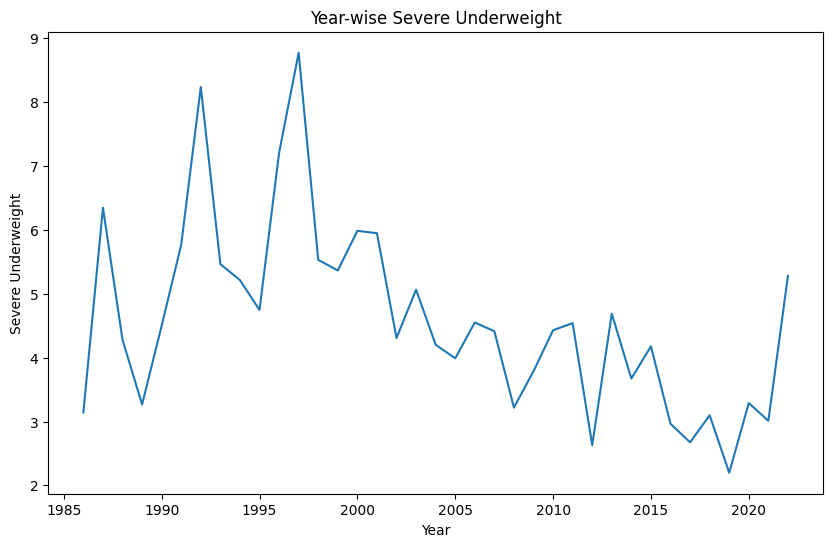

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(time_series_df.Time_period, time_series_df.Severe_Underweight)
plt.xlabel('Year')
plt.ylabel('Severe Underweight')
plt.title('Year-wise Severe Underweight')
plt.show()

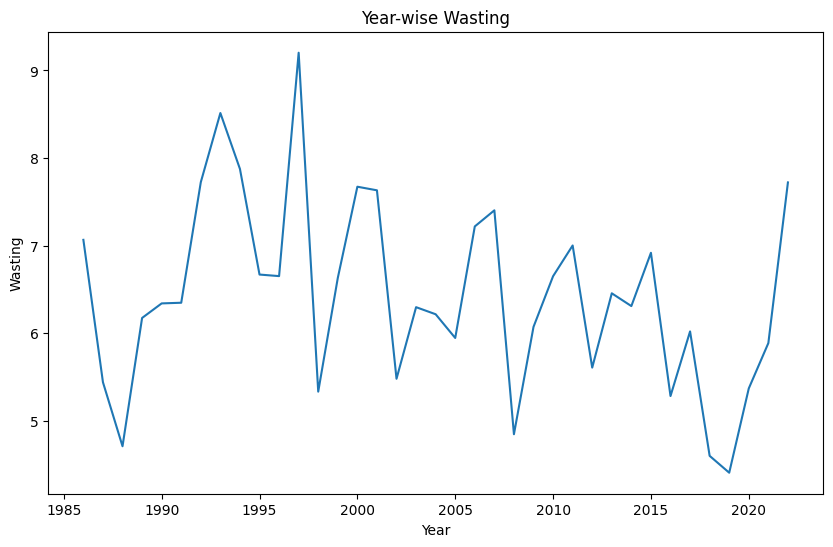

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(time_series_df.Time_period, time_series_df.Wasting)
plt.xlabel('Year')
plt.ylabel('Wasting')
plt.title('Year-wise Wasting')
plt.show()

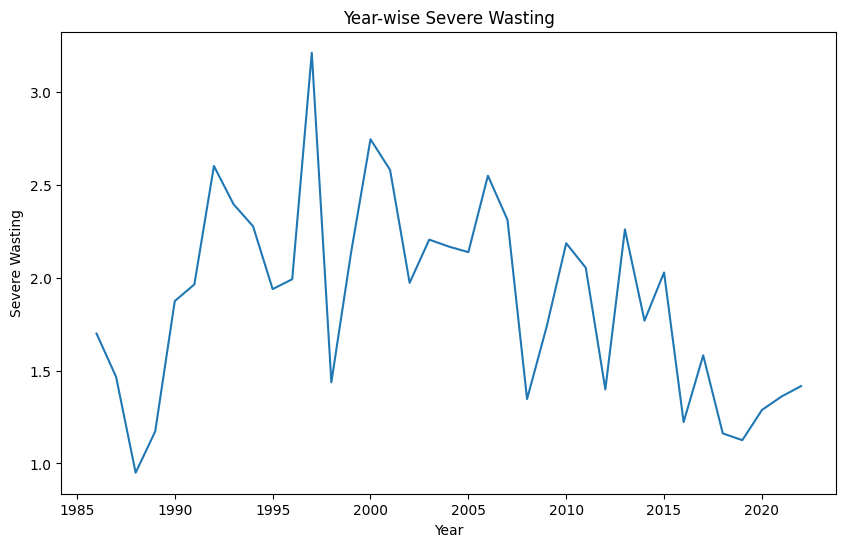

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(time_series_df.Time_period, time_series_df.Severe_Wasting)
plt.xlabel('Year')
plt.ylabel('Severe Wasting')
plt.title('Year-wise Severe Wasting')
plt.show()

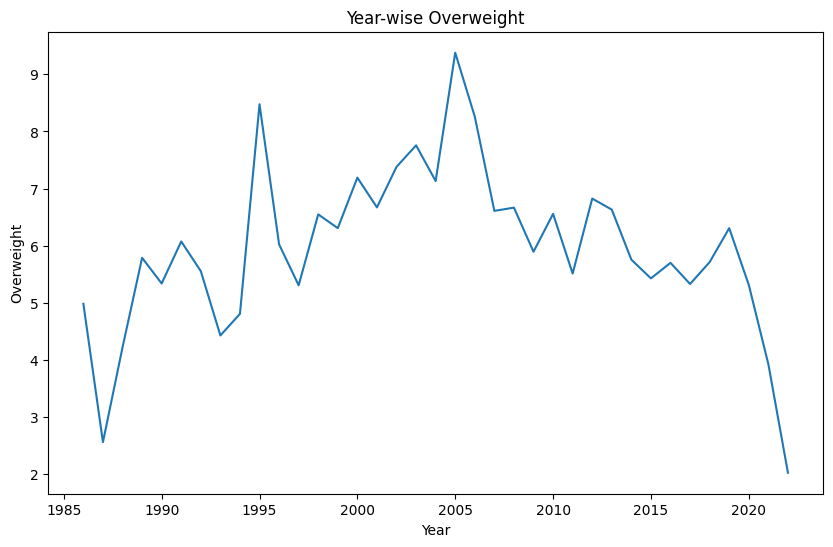

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(time_series_df.Time_period, time_series_df.Overweight)
plt.xlabel('Year')
plt.ylabel('Overweight')
plt.title('Year-wise Overweight')
plt.show()

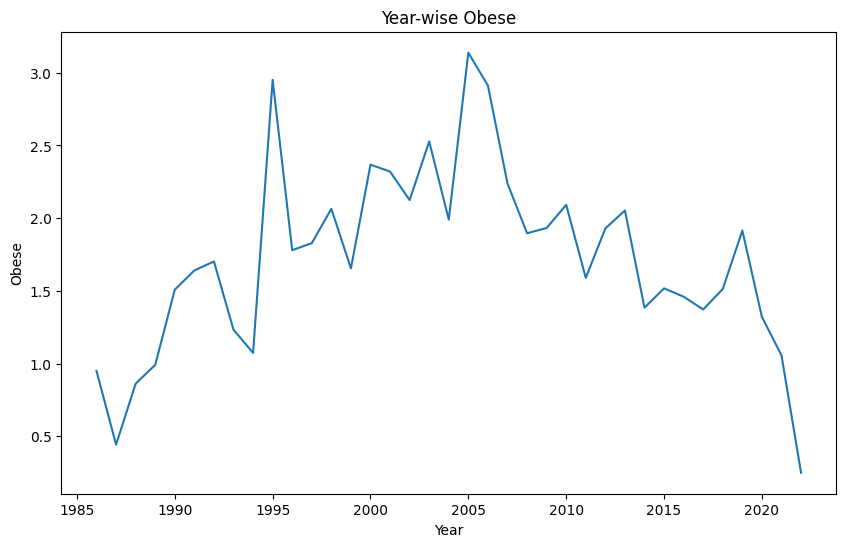

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(time_series_df.Time_period, time_series_df.Obese)
plt.xlabel('Year')
plt.ylabel('Obese')
plt.title('Year-wise Obese')
plt.show()

In [ ]:
country_wise_avg_df = new_df.pivot_table(index = 'Geographic_Area', columns="Indicator",values="Observation_value", aggfunc = np.mean)

In [ ]:
country_wise_avg_df

Indicator                                BMI-for-age (Standard Deviation)  \
Geographic_Area                                                             
 Afghanistan                                                     1.377778   
 Albania                                                         1.755556   
 Algeria                                                         1.538095   
 Andorra                                                              NaN   
 Angola                                                          1.200000   
 Antigua and Barbuda                                                  NaN   
 Argentina                                                       1.233333   
 Armenia                                                         1.460000   
 Australia                                                       0.933333   
 Austria                                                              NaN   
 Azerbaijan                                                      1.500000   
 Bahamas                                                              NaN   
 Bahrain                                                              NaN   
 Bangladesh                                                      1.181481   
 Barbados                                                        1.533333   
 Belarus                                                         1.233333   
 Belgium                                                         1.000000   
 Belize                                                          1.255556   
 Benin                                                           1.220000   
 Bhutan                                                          1.266667   
 Bolivia (Plurinational State of)                                1.180952   
 Bosnia and Herzegovina                                          1.622222   
 Botswana                                                        1.550000   
 Brazil                                                          1.191667   
 Brunei Darussalam                                                    NaN   
 Bulgaria                                                        1.400000   
 Burkina Faso                                                    1.164286   
 Burundi                                                         1.100000   
 Cabo Verde                                                           NaN   
 Cambodia                                                        1.295238   
 Cameroon                                                        1.400000   
 Canada                                                               NaN   
 Central African Republic                                        1.288889   
 Chad                                                            1.356667   
 Chile                                                                NaN   
 China                                                           1.254167   
 Colombia                                                        1.038889   
 Comoros                                                         1.833333   
 Congo                                                           1.388889   
 Cook Islands                                                         NaN   
 Costa Rica                                                      1.100000   
 Croatia                                                              NaN   
 Cuba                                                            1.233333   
 Cyprus                                                               NaN   
 Czechia                                                         1.166667   
 Côte d'Ivoire                                                   1.338889   
 Democratic People's Republic of Korea                           1.200000   
 Democratic Republic of the Congo                                1.480000   
 Denmark                                                              NaN   
 Djibouti                                                        1.133333